# Lab | Cleaning numerical data

In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
# 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Checking for number of rows and columns
customer_df.shape

(9134, 24)

In [4]:
# Checking for dataframe column types
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# Checking for df general info
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns = customer_df.columns.str.replace(' ', '_').str.lower()
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# 5.Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
# Checking for dataframe column types
column_type = customer_df['effective_to_date'].dtypes
print(column_type)

datetime64[ns]


In [9]:
# getting the numbers round
customer_df_new = customer_df.round(2)
customer_df_new

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [10]:
# 6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

categorical_df = customer_df_new.select_dtypes(include= 'object')
numerical_df = customer_df_new.select_dtypes(include= np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


In [11]:
# 7.Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

# checking for unique values
unique_values_premium = numerical_df['monthly_premium_auto'].unique()
unique_values_claim = numerical_df['months_since_last_claim'].unique()
unique_values_complaints = numerical_df['number_of_open_complaints'].unique()
unique_values_last_claim = numerical_df['months_since_last_claim'].unique()

print(unique_values_premium)
print(unique_values_claim)
print(unique_values_complaints)
print(unique_values_last_claim)

[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286]
[32 13 18 12 14  0 17 23 27  9 21 11 31  8  4 30 22 15 33  1 19 28 10  7
  3  5 20 24 29 34  6 35  2 16 26 25]
[0 2 1 3 5 4]
[32 13 18 12 14  0 17 23 27  9 21 11 31  8  4 30 22 15

In [12]:
# Converting 'income' int to float
numerical_df['income'] = numerical_df['income'].astype(float)
numerical_df['monthly_premium_auto'] = numerical_df['monthly_premium_auto'].astype(float)
# Check the data types of the columns
print(numerical_df.dtypes)

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object


In [13]:
numerical_df.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274.0,69.0,32,5,0,1,384.81
1,6979.54,0.0,94.0,13,42,0,8,1131.46
2,12887.43,48767.0,108.0,18,38,0,2,566.47
3,7645.86,0.0,106.0,18,65,0,7,529.88
4,2813.69,43836.0,73.0,12,44,0,1,138.13
5,8256.30,62902.0,69.0,14,94,0,2,159.38
6,5380.90,55350.0,67.0,0,13,0,9,321.60
7,7216.10,0.0,101.0,0,68,0,4,363.03
8,24127.50,14072.0,71.0,13,3,0,2,511.20
9,7388.18,28812.0,93.0,17,7,0,8,425.53


In [14]:
# Defining my function

def differentiate_variables(numerical_df):
    continuous_columns = []
    discrete_columns = []

    for column in numerical_df.columns:
        dtype = numerical_df[column].dtype
        if dtype == 'float64':
            continuous_columns.append(column)
        else:
            discrete_columns.append(column)

    continuous_df = numerical_df[continuous_columns]
    discrete_df = numerical_df[discrete_columns]

    return continuous_df, discrete_df

# Call the function with your DataFrame (numerical_df)
continuous_df, discrete_df = differentiate_variables(numerical_df)

# Checking results

continuous_df = round((continuous_df),2)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.52,56274.0,69.0,384.81
1,6979.54,0.0,94.0,1131.46
2,12887.43,48767.0,108.0,566.47
3,7645.86,0.0,106.0,529.88
4,2813.69,43836.0,73.0,138.13


In [15]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


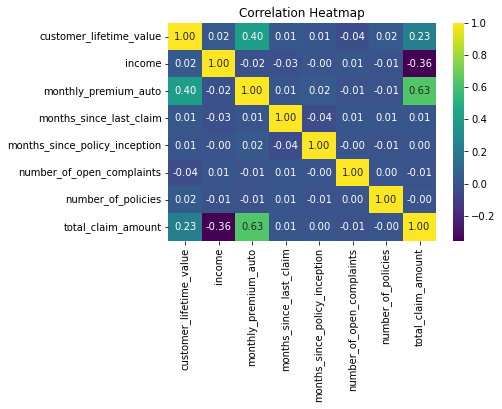

In [16]:
# 8.Plot a correlation matrix, comment what you see.
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
'''There are a few goof correlations between the variables customer_lifetime_value and monthly premium and also between these two
and our target. Despite of being good correlations, the correlation value is good (not higher values) and could be beneficial for our model'''

'There are a few goof correlations between the variables customer_lifetime_value and monthly premium and also between these two\nand our target. Despite of being good correlations, the correlation value is good (not higher values) and could be beneficial for our model'

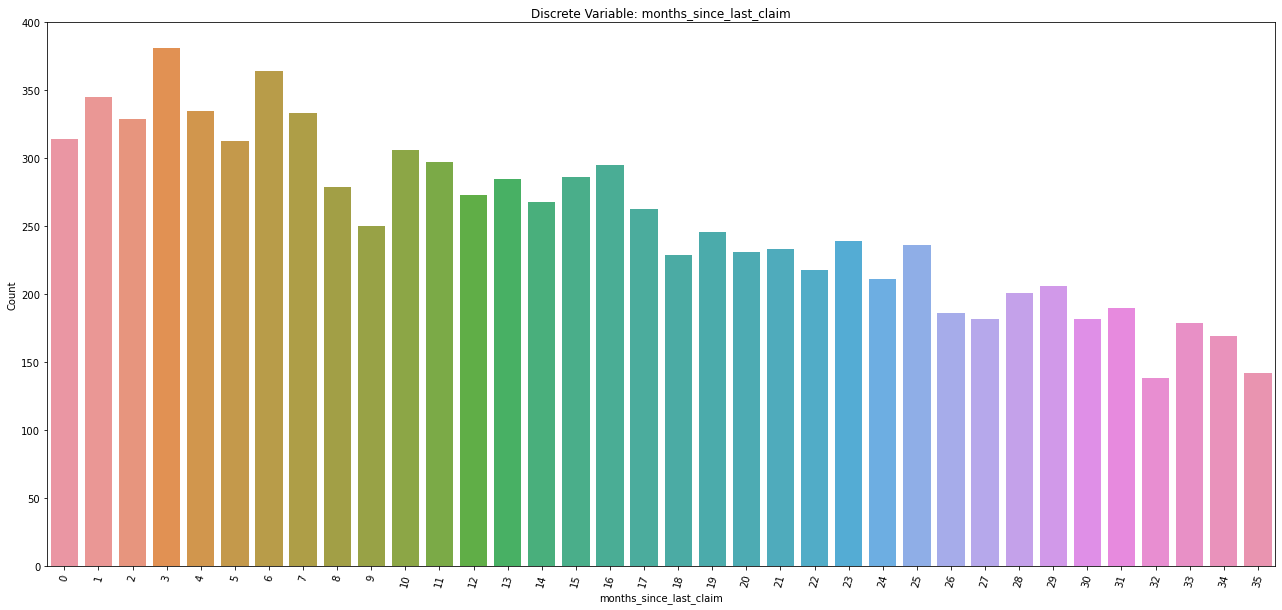

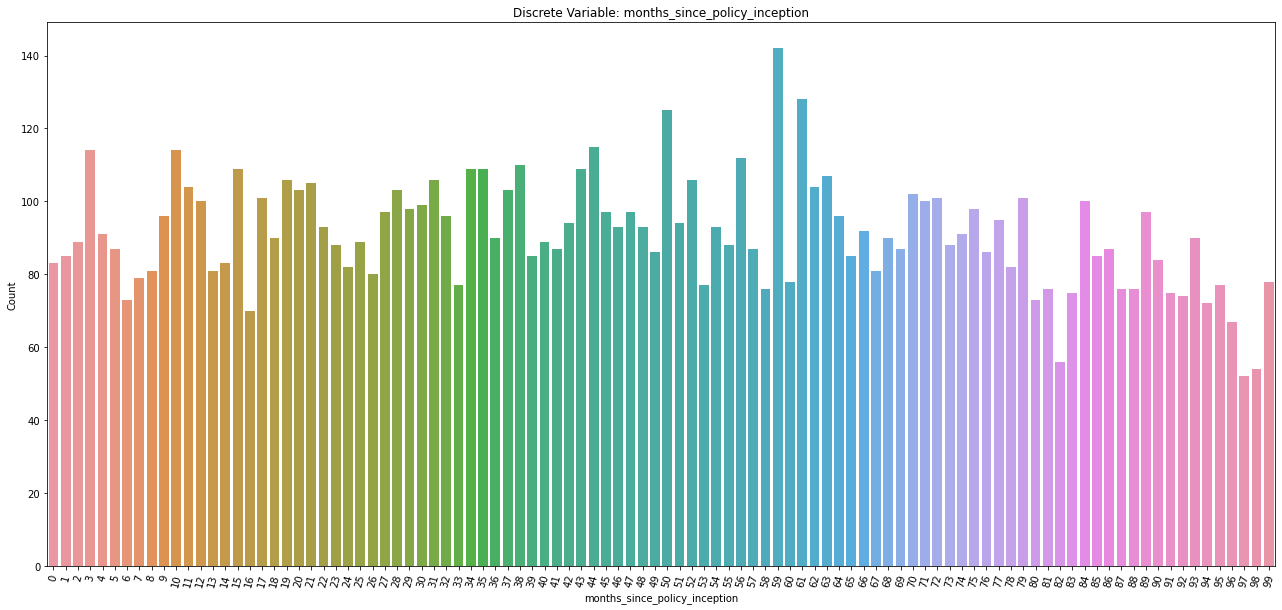

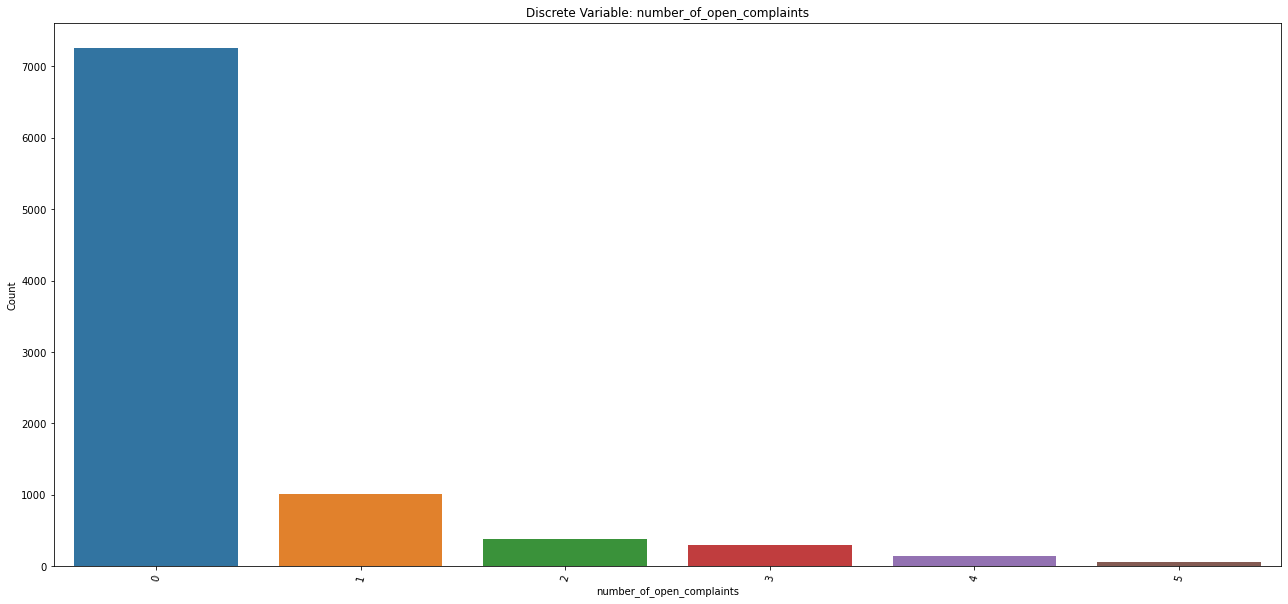

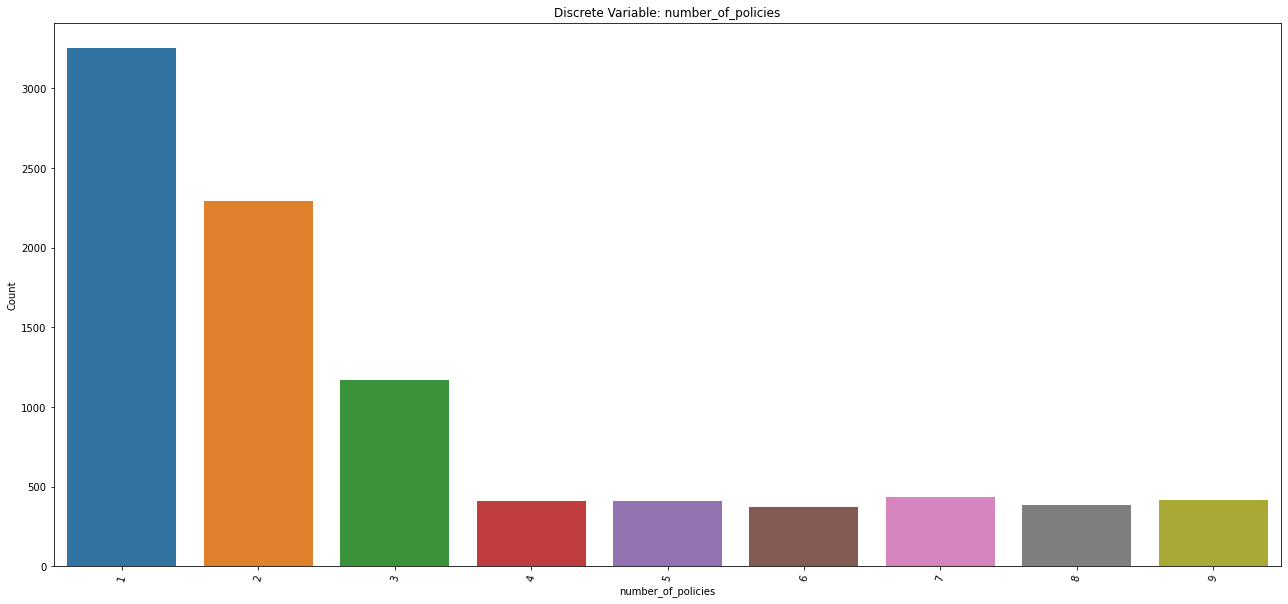

In [18]:
# 9.Create a function to plot every discrete variable. Do the same with the continuous variables 
  #(Be Careful, you may need to change the plot type to one better suited for continuous data!)

def plot_discrete_variables(dataframe):
    # Select columns with data types 'int' or 'object' as discrete variables
    discrete_columns = dataframe.select_dtypes(include=['int', 'object']).columns

    for column in discrete_columns:
        plt.figure(figsize=(22,10))
        sns.countplot(data=dataframe, x=column)
        plt.title(f'Discrete Variable: {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation = 75) 
        plt.show()
    
plot_discrete_variables(numerical_df)    

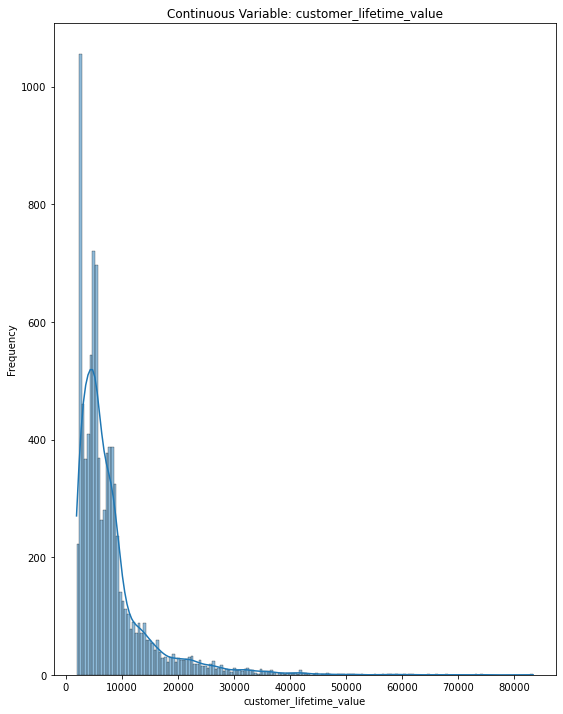

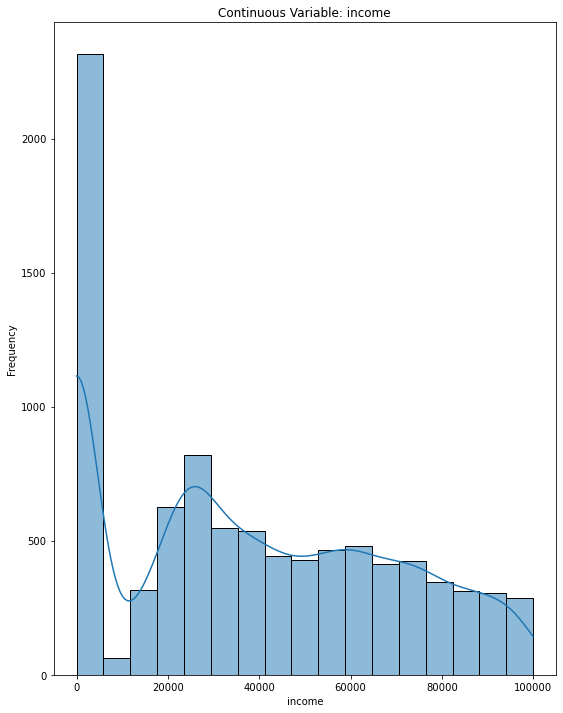

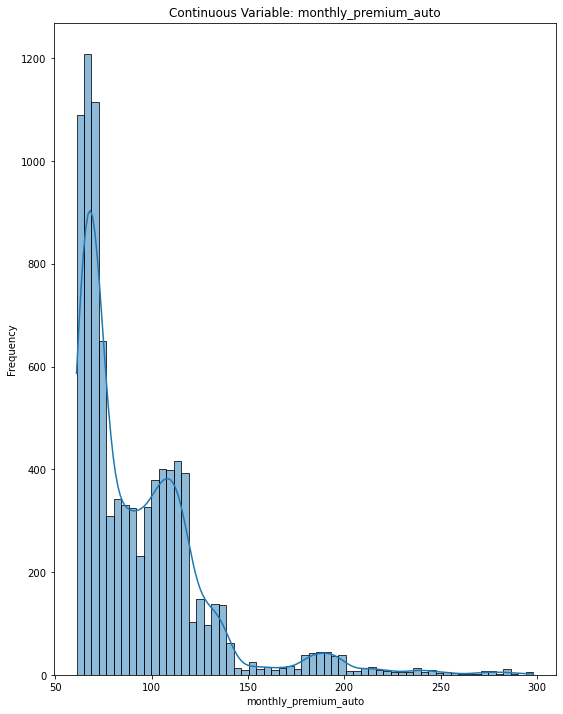

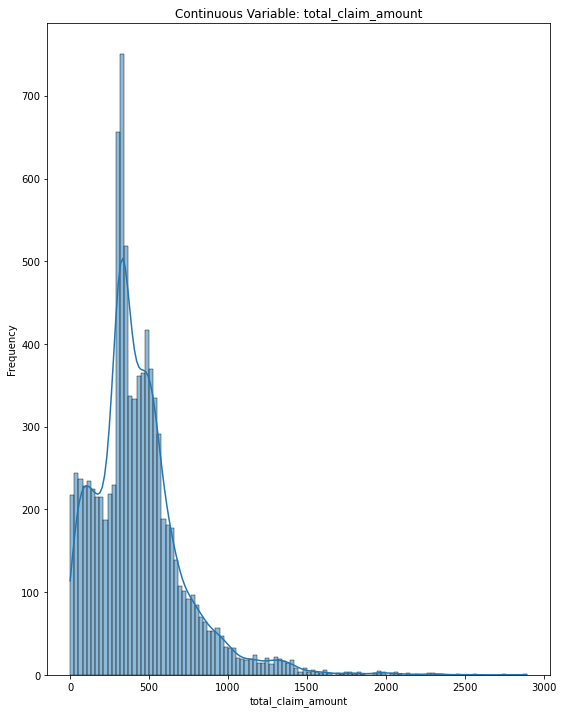

In [19]:
def plot_continuous_variables(numerical_df):
    continuous_columns = numerical_df.select_dtypes(include=['float']).columns
        
    for column in continuous_columns:
        plt.figure(figsize=(9, 12))
        sns.histplot(data=numerical_df, x=column, kde=True)
        plt.title(f'Continuous Variable: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    
# Plot continuous variables
plot_continuous_variables(numerical_df)

In [20]:
# 10. Comment what you can see in the plots.
'''For both continuous ad dicrete plots, its visible that the majority of the variables on each shoe a high skew with the tail
to the right. The 'months_since_policy_inception' variable from the discrete values tables is the most fairly distributed.'''

"For both continuous ad dicrete plots, its visible that the majority of the variables on each shoe a high skew with the tail\nto the right. The 'months_since_policy_inception' variable from the discrete values tables is the most fairly distributed."

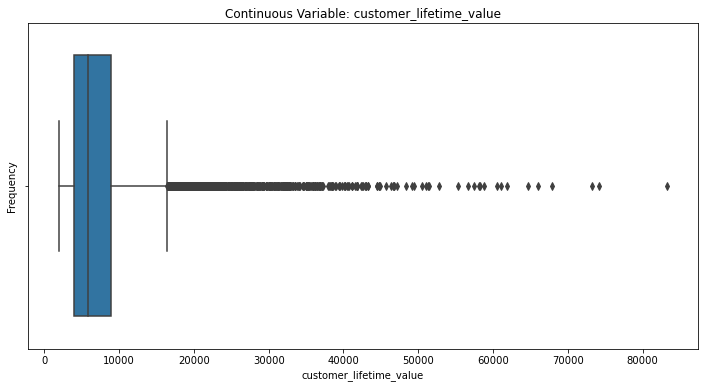

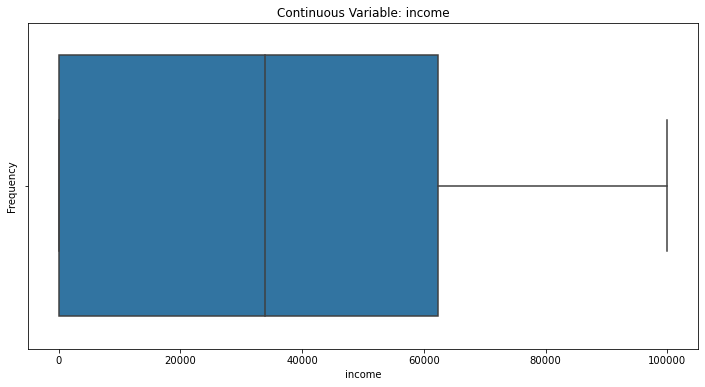

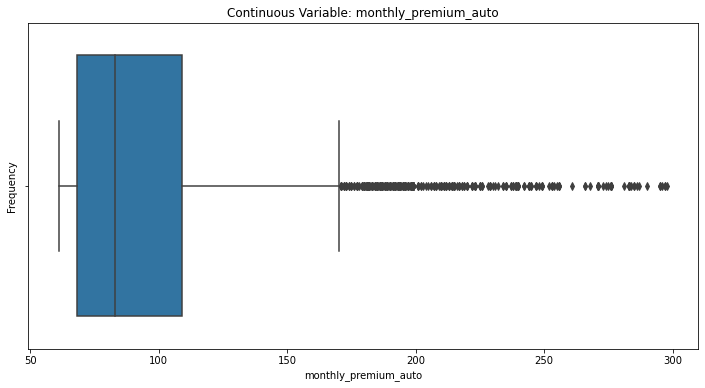

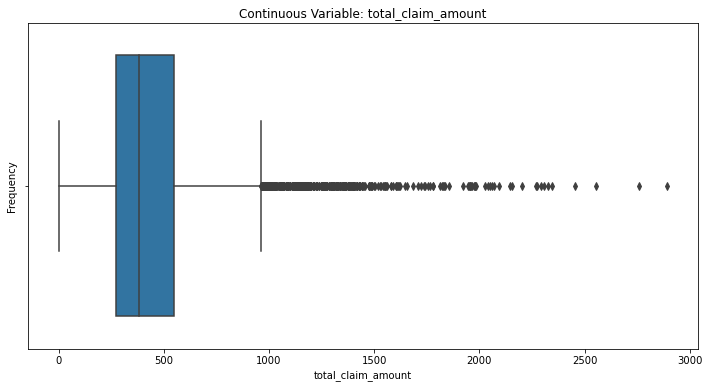

In [21]:
# 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!
def plot_outliers(numerical_df, continuous_columns):
    for column in continuous_columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=numerical_df, x=column)
        plt.title(f'Continuous Variable: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
continuous_columns = ['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']
plot_outliers(numerical_df, continuous_columns)

In [22]:
# Calculate the IQR
iqr = np.nanpercentile(numerical_df['customer_lifetime_value'], 75) - np.nanpercentile(numerical_df['customer_lifetime_value'], 25)

# Calculate the upper limit for outliers
upper_limit = np.nanpercentile(numerical_df['customer_lifetime_value'], 75) + 1.5 * iqr

# Check for outliers
outliers = numerical_df[numerical_df['customer_lifetime_value'] > upper_limit]

# Calculate the number of outliers
count_outer_75 = len(outliers)

print("Number of possible Outliers:", count_outer_75)


Number of possible Outliers: 816


In [23]:
# Calculate the IQR
iqr = np.nanpercentile(numerical_df['total_claim_amount'], 75) - np.nanpercentile(numerical_df['customer_lifetime_value'], 25)

# Calculate the upper limit for outliers
upper_limit = np.nanpercentile(numerical_df['total_claim_amount'], 75) + 1.5 * iqr

# Check for outliers
outliers = numerical_df[numerical_df['total_claim_amount'] > upper_limit]

# Calculate the number of outliers
count_outer_75 = len(outliers)

print("Number of Outliers:", count_outer_75)

Number of Outliers: 9134


In [24]:
# 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. 
# Also, remove them from your main dataframe.

'''I dind´t find outliers, as explained in the upper line, however there is a huge right skew shown on the plots, that can 
be treated using the np.log function, to bring the values is sort of a more normal distribution (bell shape).'''

'I dind´t find outliers, as explained in the upper line, however there is a huge right skew shown on the plots, that can \nbe treated using the np.log function, to bring the values is sort of a more normal distribution (bell shape).'

In [25]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274.0,69.0,32,5,0,1,384.81
1,6979.54,0.0,94.0,13,42,0,8,1131.46
2,12887.43,48767.0,108.0,18,38,0,2,566.47
3,7645.86,0.0,106.0,18,65,0,7,529.88
4,2813.69,43836.0,73.0,12,44,0,1,138.13


In [26]:
# 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

# Identifying how many null values each column has
null_counts = numerical_df.isnull().sum()
null_counts

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [27]:
numerical = numerical_df.round(2)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274.0,69.0,32,5,0,1,384.81
1,6979.54,0.0,94.0,13,42,0,8,1131.46
2,12887.43,48767.0,108.0,18,38,0,2,566.47
3,7645.86,0.0,106.0,18,65,0,7,529.88
4,2813.69,43836.0,73.0,12,44,0,1,138.13


In [28]:
# Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_df.to_csv('numerical.csv', index=False)

# Lab | Cleaning categorical data

In [29]:
# 1.Open the notebook created for Lab-cleaning-numerical-data - Previously done steps up, just getting my customer_df_new
customer_df_new

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [30]:
# 2. Find all of the categorical data. Save it in a categorical_df table.
categorical_df = customer_df_new.select_dtypes(include= 'object')
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [31]:
# 3.Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()/len(categorical_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

In [32]:
# 4.Check all unique values of columns.
unique_values = {}
for column in categorical_df.columns:
    unique_values[column] = categorical_df[column].unique()

unique_values

{'customer': array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
        'Y167826'], dtype=object),
 'state': array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
       dtype=object),
 'response': array(['No', 'Yes'], dtype=object),
 'coverage': array(['Basic', 'Extended', 'Premium'], dtype=object),
 'education': array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
       dtype=object),
 'employmentstatus': array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
       dtype=object),
 'gender': array(['F', 'M'], dtype=object),
 'location_code': array(['Suburban', 'Rural', 'Urban'], dtype=object),
 'marital_status': array(['Married', 'Single', 'Divorced'], dtype=object),
 'policy_type': array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 'policy': array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
        'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
        'Speci

In [33]:
# 5.Check dtypes. Do they all make sense as categorical data?
column_types = categorical_df.dtypes
print(column_types)

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object


In [34]:
# 6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.
# Yes.I will group and ordinal encode some of them and just replace some of them
categorical_df.drop('customer', axis=1, inplace=True)
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
categorical_df["location_code"] =categorical_df["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].replace({'Offer1': '1', 'Offer3': '3', 'Offer2': '2', 'Offer4': '4'})
categorical_df['response'] = categorical_df['response'].replace({'No':'0', 'Yes':'1'})
categorical_df["education"] =categorical_df["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master" : 1, "Doctor":1})
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})
categorical_df["vehicle_size"] =categorical_df["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})
categorical_df.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,0.5
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,3,Agent,Four-Door Car,0.5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,0.5
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,1,Call Center,SUV,0.5
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,0.5
5,Oregon,1,0.0,0.5,2.0,F,0.0,Married,Personal Auto,Personal L3,2,Web,Two-Door Car,0.5
6,Oregon,1,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,0.5
7,Arizona,0,1.0,1.0,0.0,M,1.0,Single,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,0.5
8,Oregon,1,0.0,0.5,0.0,M,0.5,Divorced,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,0.5
9,Oregon,0,0.5,0.5,2.0,F,1.0,Married,Special Auto,Special L2,2,Branch,Four-Door Car,0.5


In [35]:
categorical_df.shape

(9134, 14)

In [36]:
# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# Yes. I can also group some of the features in vehicle_class and also transform the aloha-numeric 
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace(['Luxury SUV', 'Sports Car','Luxury Car'],'Luxury')
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,0.5
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,3,Agent,Four-Door Car,0.5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,0.5
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,1,Call Center,SUV,0.5
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,0.5


In [37]:
categorical_df.shape

(9134, 14)

In [38]:
# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
''' In Policy type when can see, has the name says, the type of policy that each customer has ('Corporate Auto', 'Personal Auto'
, 'Special Auto') in the other hand, policy_Type may represent the  different degrees of coverage, pricing, or target markets'''


" In Policy type when can see, has the name says, the type of policy that each customer has ('Corporate Auto', 'Personal Auto'\n, 'Special Auto') in the other hand, policy_Type may represent the  different degrees of coverage, pricing, or target markets"

In [39]:
# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? 
# Comment your thoughts and make those changes.
categorical_df['policy'].unique()
categorical_df['policy_type'].unique()
# After checking the unique values of each, I can say that I could just drop the policy column because the policy type gathers 
# all the information nedded, however, I decided to combine them instead in a single column.
#UPDATE: after attemting doing the combo type, i end up with many more columns, so I decided to go for Erin's model

categorical_df.policy = categorical_df.policy.str.replace("\w* ",'',regex=True)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,L2,1,Call Center,SUV,0.5
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,0.0,0.5,2.0,M,1.0,Married,Personal Auto,L1,2,Web,Four-Door Car,0.5
9130,California,1,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,0.5
9131,California,0,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,L2,1,Branch,Four-Door Car,0.5
9132,California,0,0.5,0.5,2.0,M,0.5,Married,Personal Auto,L2,3,Branch,Four-Door Car,1.0


In [40]:
# CODE PREVIOUSLY USED FOR THE POLICY COMBO COLUMN 
#data = {
    #'policy': ['Corporate L3 Auto', 'Personal L3 Auto', 'Corporate L2 Auto', 'Personal L1 Auto', 'Special L2 Auto', 'Corporate L1 Auto', 'Personal L2 Auto', 'Special L1 Auto', 'Special L3 Auto'],
    #'policy_type': ['Corporate Auto', 'Personal Auto', 'Corporate Auto', 'Personal Auto', 'Special Auto', 'Corporate Auto', 'Personal Auto', 'Special Auto', 'Special Auto']
    
# Combine both columns into a new 'combined' column
#categorical_df['policy_combined'] = categorical_df['policy'] + ' ' + categorical_df['policy_type']
#categorical_df.head()

# Remove duplicate words within the 'combined' column
#categorical_df['policy_combined'] = categorical_df['policy_combined'].apply(lambda x: ' '.join(set(x.split())))
#categorical_df.head()

# Dropping policy and policy_type columns
#categorical_df.drop(['policy', 'policy_type'], axis=1, inplace=True)
#categorical_df

In [41]:
# 10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [42]:
# Getting the 'Effective To Date' column back from the original dataframe concatenated with the categorical_df to be
# able to continue in next lab
effective_to_date_column = customer_df['effective_to_date']
# Add it to 'categorical_df'
categorical_df['effective_to_date'] = effective_to_date_column

In [43]:
categorical_df.to_csv('categorical.csv', index=False)

# Lab | Feature extraction

In [44]:
# 1.Open the categorical dataframe we created before.
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5,2011-02-24
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5,2011-01-31
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5,2011-02-19
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,L2,1,Call Center,SUV,0.5,2011-01-20
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,0.0,0.5,2.0,M,1.0,Married,Personal Auto,L1,2,Web,Four-Door Car,0.5,2011-02-10
9130,California,1,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,0.5,2011-02-12
9131,California,0,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,L2,1,Branch,Four-Door Car,0.5,2011-02-06
9132,California,0,0.5,0.5,2.0,M,0.5,Married,Personal Auto,L2,3,Branch,Four-Door Car,1.0,2011-02-03


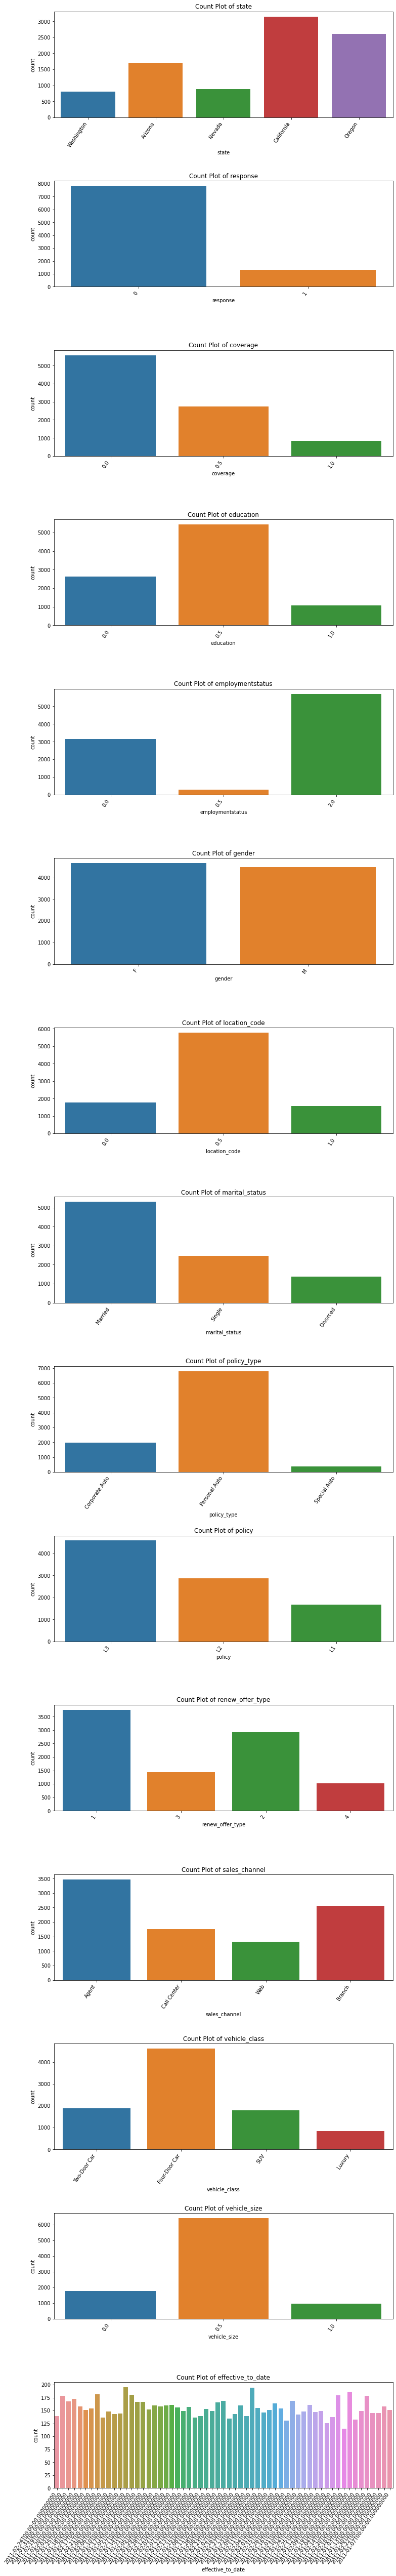

In [45]:
# 2.Plot all the categorical variables with the proper plot. What can you see?

# List of categorical columns in the dataframe
categorical_columns = categorical_df.columns

# Set the number of subplots based on the number of categorical columns
num_subplots = len(categorical_columns)

# Create subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 6 * num_subplots))
plt.subplots_adjust(hspace=0.6)

# Loop through each categorical column and create a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=categorical_df, x=column, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=55, ha="right")

plt.show()

In [46]:
# 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
'''Two columns that seem to be redundant were policy and policy type, which I decided in the previous lab to deal with, combining 
them in one column. Apart of those I just have grouped some of the other variables per column.'''

'Two columns that seem to be redundant were policy and policy type, which I decided in the previous lab to deal with, combining \nthem in one column. Apart of those I just have grouped some of the other variables per column.'

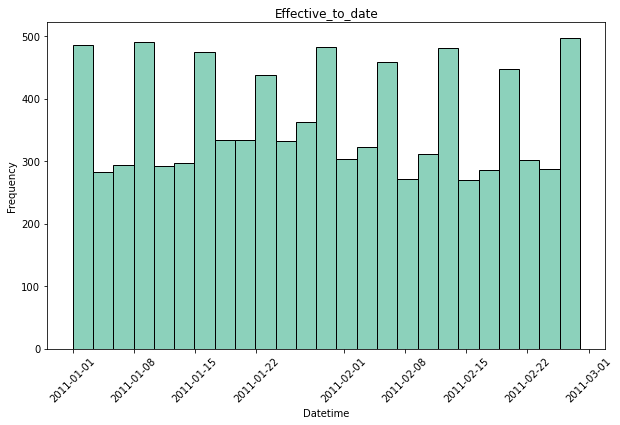

In [47]:
# 4.Plot time variable. Can you extract something from it?
'''Yes, we can split the sate in day, month and year.'''

# Creating a histogram for the datetime column
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
sns.histplot(data=categorical_df, x='effective_to_date', bins=25, kde=False, color=custom_palette[0])  # Adjust the color as needed
plt.title('Effective_to_date')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [48]:
# 5.The time variable can be useful.
# You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.
# Spliting the date
categorical_df['Day'] = categorical_df['effective_to_date'].dt.day
categorical_df['Month'] = categorical_df['effective_to_date'].dt.month
categorical_df['Week'] = categorical_df['effective_to_date'].dt.isocalendar().week

categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,Day,Month,Week
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5,2011-02-24,24,2,8
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5,2011-01-31,31,1,5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5,2011-02-19,19,2,7
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,L2,1,Call Center,SUV,0.5,2011-01-20,20,1,3
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5,2011-02-03,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,0.0,0.5,2.0,M,1.0,Married,Personal Auto,L1,2,Web,Four-Door Car,0.5,2011-02-10,10,2,6
9130,California,1,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,0.5,2011-02-12,12,2,6
9131,California,0,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,L2,1,Branch,Four-Door Car,0.5,2011-02-06,6,2,5
9132,California,0,0.5,0.5,2.0,M,0.5,Married,Personal Auto,L2,3,Branch,Four-Door Car,1.0,2011-02-03,3,2,5


In [49]:
# Dropping effective_to_date column
categorical_df.drop('effective_to_date', axis=1, inplace=True)

In [50]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Day,Month,Week
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5,24,2,8
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5,31,1,5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5,19,2,7
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,L2,1,Call Center,SUV,0.5,20,1,3
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,0.0,0.5,2.0,M,1.0,Married,Personal Auto,L1,2,Web,Four-Door Car,0.5,10,2,6
9130,California,1,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,0.5,12,2,6
9131,California,0,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,L2,1,Branch,Four-Door Car,0.5,6,2,5
9132,California,0,0.5,0.5,2.0,M,0.5,Married,Personal Auto,L2,3,Branch,Four-Door Car,1.0,3,2,5


# Lab | Comparing regression models

In [51]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

In [52]:
# concatenate both again
data = pd.concat([numerical_df, categorical_df],axis=1)
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Day,Month,Week
0,2763.52,56274.0,69.0,32,5,0,1,384.81,Washington,0,...,Married,Corporate Auto,L3,1,Agent,Two-Door Car,0.5,24,2,8
1,6979.54,0.0,94.0,13,42,0,8,1131.46,Arizona,0,...,Single,Personal Auto,L3,3,Agent,Four-Door Car,0.5,31,1,5
2,12887.43,48767.0,108.0,18,38,0,2,566.47,Nevada,0,...,Married,Personal Auto,L3,1,Agent,Two-Door Car,0.5,19,2,7
3,7645.86,0.0,106.0,18,65,0,7,529.88,California,0,...,Married,Corporate Auto,L2,1,Call Center,SUV,0.5,20,1,3
4,2813.69,43836.0,73.0,12,44,0,1,138.13,Washington,0,...,Single,Personal Auto,L1,1,Agent,Four-Door Car,0.5,3,2,5


In [53]:
# X-y split were I isolate my TARGET
X = data.drop('total_claim_amount',axis = 1)
y= data['total_claim_amount']

In [54]:
y.head()

0     384.81
1    1131.46
2     566.47
3     529.88
4     138.13
Name: total_claim_amount, dtype: float64

In [55]:
X.shape

(9134, 24)

In [56]:
# 1.Import sklearn train_test_split and separate the data (in the first cell of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Checking values coherence(random_state) we run this next
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 24)
(1827, 24)
(7307,)
(1827,)


In [57]:
# Check for:
X_train.head()
y_train.head()

5190    117.87
8076    499.20
4688    547.20
497     504.00
4797    986.40
Name: total_claim_amount, dtype: float64

In [58]:
# 2.Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [59]:
X_train_cat.shape

(7307, 9)

In [60]:
X_test_cat.shape

(1827, 9)

In [61]:
list(X_train_cat.columns)==list(X_test_cat.columns)

True

In [62]:
# 3.Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

# Using X_train_num to fit scalers
transformer = MinMaxScaler().fit(X_train_num) 
x_normalized = transformer.transform(X_train_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_train_num.columns)
x_normalized 

(7307, 15)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size,Day,Month,Week
0,0.020657,0.257580,0.122363,0.257143,0.232323,0.0,0.000,0.5,1.0,1.0,0.0,0.5,0.466667,0.0,0.019608
1,0.026504,0.300727,0.181435,0.114286,0.222222,0.0,0.000,0.0,0.5,1.0,0.5,1.0,0.866667,0.0,0.058824
2,0.013157,0.365623,0.063291,0.285714,0.959596,0.0,0.000,0.5,0.5,1.0,0.5,0.0,0.166667,0.0,0.000000
3,0.007605,0.000000,0.037975,0.571429,0.818182,0.0,0.000,0.0,0.0,0.0,0.5,0.0,0.966667,0.0,0.058824
4,0.243974,0.351377,0.320675,0.514286,0.464646,0.0,0.125,0.5,0.0,1.0,0.5,1.0,0.600000,0.0,0.039216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.044199,0.000000,0.046414,0.942857,0.393939,0.0,0.750,0.0,0.0,0.0,0.5,0.0,0.733333,1.0,0.137255
7303,0.017684,0.000000,0.130802,0.314286,0.777778,0.0,0.000,0.5,0.5,0.0,0.5,0.5,0.200000,1.0,0.098039
7304,0.298802,0.358820,0.206751,0.571429,0.515152,0.0,0.125,0.0,0.5,1.0,0.5,0.5,0.466667,0.0,0.019608
7305,0.489846,0.466052,0.244726,0.971429,0.747475,0.4,0.125,1.0,0.0,1.0,0.5,0.5,1.000000,0.0,0.078431


In [63]:
# apply scaler to X_test_num, don't re-fit
X_test_num_scaled = transformer.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)
X_test_num_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size,Day,Month,Week
0,0.011284,0.000000,0.067511,0.942857,0.868687,0.0,0.000,0.5,0.5,0.0,0.0,1.0,0.600000,1.0,0.117647
1,0.064901,0.135473,0.139241,0.142857,0.353535,0.0,0.875,0.5,0.0,0.0,0.5,0.0,0.933333,0.0,0.058824
2,0.081278,0.379248,0.198312,0.200000,0.090909,0.0,0.750,1.0,0.0,1.0,0.5,0.5,0.666667,1.0,0.137255
3,0.098887,0.000000,0.147679,0.028571,0.797980,0.0,0.125,0.5,0.5,0.0,0.5,1.0,0.366667,0.0,0.019608
4,0.075317,0.000000,0.215190,0.200000,0.424242,0.0,1.000,0.0,0.0,0.0,0.5,0.5,0.000000,1.0,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.011210,0.429538,0.042194,0.400000,0.090909,0.0,0.000,0.0,0.5,1.0,1.0,0.0,0.233333,0.0,0.000000
1823,0.370491,0.248607,0.177215,0.228571,1.000000,0.0,0.125,0.0,0.0,1.0,0.5,0.5,0.466667,0.0,0.019608
1824,0.009466,0.563640,0.033755,0.342857,0.898990,0.0,0.000,0.0,0.5,1.0,0.5,0.0,0.466667,1.0,0.117647
1825,0.067248,0.616080,0.000000,0.514286,0.939394,0.0,0.125,0.0,0.5,1.0,1.0,0.5,0.666667,0.0,0.039216


In [64]:
# 4.Encode the categorical variables X_train_cat
encoder = OneHotEncoder(drop='first').fit(X_train_cat)  
encoded = encoder.transform(X_train_cat).toarray()
column_names = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
onehot_encoded = pd.DataFrame(encoded, columns=column_names)
onehot_encoded.head(20)

,state_California,state_Nevada,state_Oregon,state_Washington,response_1,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,policy_L3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
# apply Onehot encoding to X_test_cat, don't re-fit
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(X_test_cat_encoded, columns=cols)

In [66]:
# combine scaled and onehot_encoded portions of X_test
X_train_treated = pd.concat([x_normalized, onehot_encoded], axis=1)


In [67]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_num_scaled, onehot_encoded_test], axis=1)
X_test_treated

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,policy_L3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.011284,0.000000,0.067511,0.942857,0.868687,0.0,0.000,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.064901,0.135473,0.139241,0.142857,0.353535,0.0,0.875,0.5,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.081278,0.379248,0.198312,0.200000,0.090909,0.0,0.750,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.098887,0.000000,0.147679,0.028571,0.797980,0.0,0.125,0.5,0.5,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.075317,0.000000,0.215190,0.200000,0.424242,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.011210,0.429538,0.042194,0.400000,0.090909,0.0,0.000,0.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1823,0.370491,0.248607,0.177215,0.228571,1.000000,0.0,0.125,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1824,0.009466,0.563640,0.033755,0.342857,0.898990,0.0,0.000,0.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1825,0.067248,0.616080,0.000000,0.514286,0.939394,0.0,0.125,0.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# 5.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, 
# change it using encoding.
'''Every column is numeric, so Iam ready to create my model'''

'Every column is numeric, so Iam ready to create my model'

In [69]:
# 6.Try a simple linear regression with all the data to see whether we are getting good results.

lm = linear_model.LinearRegression()
lm.fit(X_train_treated, y_train)

# R2 Score_train
predictions = lm.predict(X_train_treated)
print (r2_score(y_train, predictions))

0.6289612363514223


In [70]:
# R2 Score_test
predictions_test = lm.predict(X_test_treated)
r2_score(y_test, predictions_test)

0.6239694300556207

In [71]:
# 7.Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them 
# without repeating code.

# Define the models
models_to_try = [lm, KNeighborsRegressor(), MLPRegressor(random_state=1, max_iter=2000),
    DecisionTreeRegressor(), RandomForestRegressor()]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_treated, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')
'''The model that had the best performance was RandomForestRegressor'''

Model: LinearRegression, R^2 Score: 0.6240
Model: KNeighborsRegressor, R^2 Score: 0.4828
Model: MLPRegressor, R^2 Score: 0.8288
Model: DecisionTreeRegressor, R^2 Score: 0.6735
Model: RandomForestRegressor, R^2 Score: 0.8464


In [72]:
# 8.Use the function to check LinearRegressor and KNeighborsRegressor.

models_to_try = [lm, KNeighborsRegressor()]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_treated, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

Model: LinearRegression, R^2 Score: 0.6240
Model: KNeighborsRegressor, R^2 Score: 0.4828


In [73]:
# 9.You can check also the MLPRegressor for this task!
models_to_try = [ MLPRegressor(random_state=1, max_iter=2000)]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_treated, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

Model: MLPRegressor, R^2 Score: 0.8288


In [74]:
# 10.Check and discuss the results

'''The score from KNeighborsRegressor is lower than the Linear Regression model, which could imply that the KNN model 
might not be as well-suited for this particular dataset or might require further hyperparameter tuning.
The MLPRegressor had the best results, suggesting that the neural network-based model has captured complex patterns and 
relationships in the data. So it would be the better option.'''

'The score from KNeighborsRegressor is lower than the Linear Regression model, which could imply that the KNN model \nmight not be as well-suited for this particular dataset or might require further hyperparameter tuning.\nThe MLPRegressor had the best results, suggesting that the neural network-based model has captured complex patterns and \nrelationships in the data. So it would be the better option.'